In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

## 데이터 준비

In [2]:
samsung = pd.read_csv("/content/005930.KS.csv")

In [3]:
samsung.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915527,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599121,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661133,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.536621,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000


In [4]:
df = samsung.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5779 non-null   object 
 1   Open       5779 non-null   float64
 2   High       5779 non-null   float64
 3   Low        5779 non-null   float64
 4   Close      5779 non-null   float64
 5   Adj Close  5779 non-null   float64
 6   Volume     5779 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 316.2+ KB


In [6]:
df['date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915527,74195000,2000-01-04
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599121,74680000,2000-01-05
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661133,54390000,2000-01-06
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.536621,40305000,2000-01-07
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000,2000-01-10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5779 non-null   object        
 1   Open       5779 non-null   float64       
 2   High       5779 non-null   float64       
 3   Low        5779 non-null   float64       
 4   Close      5779 non-null   float64       
 5   Adj Close  5779 non-null   float64       
 6   Volume     5779 non-null   int64         
 7   date       5779 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 361.3+ KB


In [10]:
df = df.drop('date', axis=1)

In [8]:
df = df.set_index('Date')
df.head()
# Date를 인덱스로 변경

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915527,74195000,2000-01-04
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599121,74680000,2000-01-05
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661133,54390000,2000-01-06
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.536621,40305000,2000-01-07
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000,2000-01-10


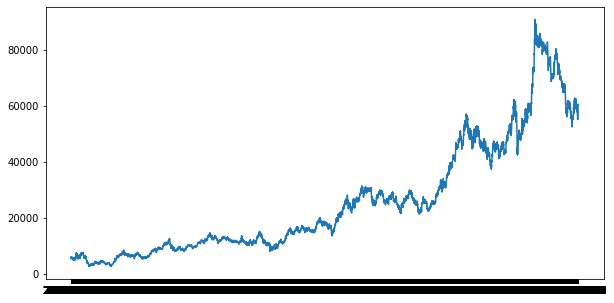

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'])
plt.show()

## 피쳐 추가

In [14]:
df['MA3'] = np.around( df['Close'].rolling(window=3).mean(), 0)
# 3일치(window) 이동평균

df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915527,74195000,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599121,74680000,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661133,54390000,5770.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.536621,40305000,5580.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000,5643.0


In [15]:
df['MA5'] = np.around( df['Close'].rolling(window=5).mean(), 0)
df['Mid'] = (df['High'] + df['Low']) / 2

df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915527,74195000,NaN,NaN,5885.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599121,74680000,NaN,NaN,5790.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661133,54390000,5770.0,NaN,5680.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.536621,40305000,5580.0,NaN,5515.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000,5643.0,5724.0,5675.0


[]

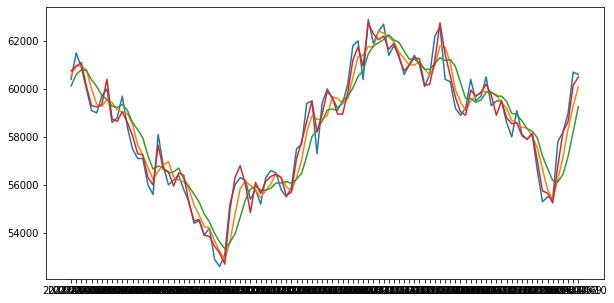

In [19]:
x = df.iloc[-100:, :]

plt.figure(figsize=(10,5))
plt.plot(x.index, x['Close'])
plt.plot(x.index, x['MA3'])
plt.plot(x.index, x['MA5'])
plt.plot(x.index, x['Mid'])
plt.plot()

## 결손치 제거

In [20]:
df.loc[df['Volume']==0]

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-02-04,5130.0,5130.0,5130.0,5130.0,3855.404541,0,5170.0,5282.0,5130.0
2000-03-01,5120.0,5120.0,5120.0,5120.0,3847.890869,0,5013.0,5046.0,5120.0
2000-04-05,6800.0,6800.0,6800.0,6800.0,5110.479492,0,6900.0,6890.0,6800.0
2000-04-13,6910.0,6910.0,6910.0,6910.0,5193.149414,0,6973.0,7084.0,6910.0
2000-05-01,6000.0,6000.0,6000.0,6000.0,4509.247559,0,5800.0,5728.0,6000.0
...,...,...,...,...,...,...,...,...,...
2022-02-28,71900.0,71900.0,71900.0,71900.0,70610.367188,0,71767.0,72780.0,71900.0
2022-03-04,72900.0,72900.0,72900.0,72900.0,71592.429688,0,72500.0,72260.0,72900.0
2022-03-10,69500.0,69500.0,69500.0,69500.0,68253.414063,0,69700.0,70980.0,69500.0


In [21]:
df['Volume'] = df['Volume'].replace(0, np.nan)
df.isna().sum(axis=0)

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
MA3            2
MA5            4
Mid            0
dtype: int64

In [23]:
df = df.dropna()
df.isna().sum(axis=0)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA3          0
MA5          0
Mid          0
dtype: int64

## 정규화

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
0,0.034868,0.032008,0.036288,0.034440,0.026655,0.285359,0.032553,0.033215,0.034066
1,0.037375,0.035517,0.038470,0.034440,0.026655,0.363715,0.033123,0.032434,0.036937
2,0.034982,0.031689,0.036518,0.033873,0.026217,0.177799,0.033808,0.032756,0.034011
3,0.034868,0.031689,0.036059,0.033760,0.026129,0.250704,0.033579,0.032962,0.033790
4,0.036235,0.033177,0.037437,0.035120,0.027181,0.300555,0.033808,0.033628,0.035225


 목표: (20, 7) 의 형태로 만들 것
- 한 번에 들어가는 피쳐 7개
- 20일치의 데이터 (window size)

In [26]:
def make_sequence_dataset(X, y, window_size):
  feature_list = []
  label_list = []
  
  for i in range(len(X)-window_size):
    feature_list.append(X[i:i+window_size])
    label_list.append(y[i+window_size])

  return np.array(feature_list), np.array(label_list)

In [31]:
X = df_scaled.drop(['Adj Close', 'Close'], axis=1)
y = df_scaled['Close']

In [34]:
X_data, y_data = make_sequence_dataset(X,y,20)

print(X_data.shape, y_data.shape)

(5628, 20, 7) (5628,)


time stamp와 x 개수 지정 완료

In [35]:
train_size = int(len(X_data)*0.8)
train_size

4502

In [37]:
X_train = X_data[:train_size]
X_test = X_data[train_size:]

y_train = y_data[:train_size]
y_test = y_data[train_size:]

X_train.shape, X_test.shape

((4502, 20, 7), (1126, 20, 7))

In [39]:
model = keras.Sequential()
model.add(layers.LSTM(32,activation='tanh', input_shape=(20, 7)))
model.add(layers.Dense(1))
# RNN을 거쳐서 20개의 time step을 다 거치면, 최종적인 결과가 1개만 나오는 형태

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                5120      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


32개에서 w, b, return w가 있어서 5120

In [67]:
model.compile(
    loss = 'mse',
    optimizer = 'rmsprop',
    metrics = ['mae']
    )

In [68]:
EPOCHS = 100
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_split = 0.2,
                verbose = 1)

Epoch 1/100
113/113 [==============================] - 6s 28ms/step - loss: 1.3714e-05 - mae: 0.0027 - val_loss: 5.5542e-05 - val_mae: 0.0055
Epoch 2/100
113/113 [==============================] - 2s 15ms/step - loss: 1.3055e-05 - mae: 0.0027 - val_loss: 6.4290e-05 - val_mae: 0.0063
Epoch 3/100
113/113 [==============================] - 1s 11ms/step - loss: 1.3171e-05 - mae: 0.0027 - val_loss: 1.5147e-04 - val_mae: 0.0096
Epoch 4/100
113/113 [==============================] - 1s 11ms/step - loss: 1.3426e-05 - mae: 0.0027 - val_loss: 1.7019e-04 - val_mae: 0.0103
Epoch 5/100
113/113 [==============================] - 1s 11ms/step - loss: 1.3603e-05 - mae: 0.0027 - val_loss: 6.5414e-05 - val_mae: 0.0063
Epoch 6/100
113/113 [==============================] - 1s 11ms/step - loss: 1.2912e-05 - mae: 0.0027 - val_loss: 8.4104e-05 - val_mae: 0.0067
Epoch 7/100
113/113 [==============================] - 1s 11ms/step - loss: 1.3122e-05 - mae: 0.0027 - val_loss: 6.3230e-05 - val_mae: 0.0058
Epoch 

In [69]:
log.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [70]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(hist['epoch'], hist['mae'],label='Train MAE')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val MAE')

    plt.legend()
    plt.show()

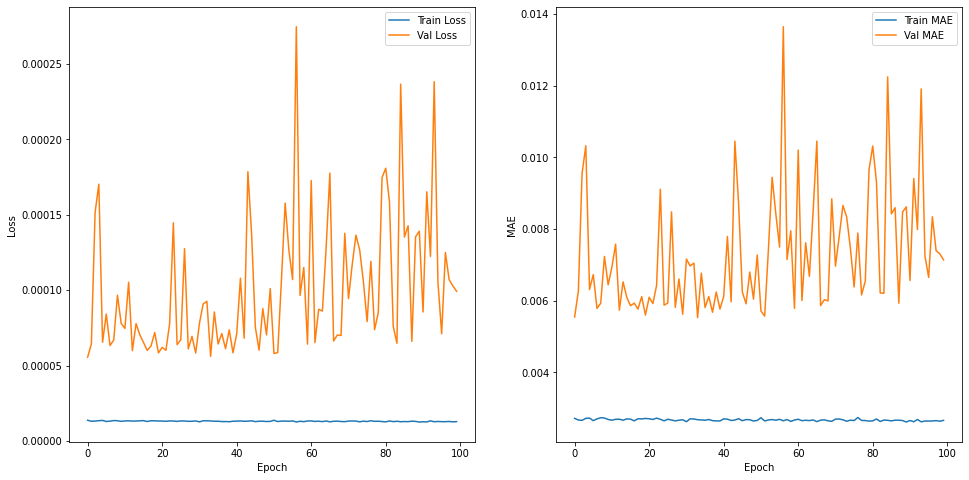

In [71]:
plot_history(log)

In [54]:
model.evaluate(X_train, y_train)

141/141 [==============================] - 1s 4ms/step - loss: 0.0046 - mae: 0.0046


[0.004572708159685135, 0.004572708159685135]

In [55]:
y_pred = model.predict(X_test).reshape(-1)
y_pred[:5]

36/36 [==============================] - 1s 4ms/step


array([0.5535724, 0.5538631, 0.5416333, 0.5181395, 0.5327943],
      dtype=float32)

In [56]:
for i in range(10):
  print(f'True: {y_test[i]}, Predict:{y_pred[i]}')

True: 0.5615724481703863, Predict:0.553572416305542
True: 0.5502435708621276, Predict:0.5538631081581116
True: 0.5298515917072618, Predict:0.5416333079338074
True: 0.5434462444771724, Predict:0.5181394815444946
True: 0.5502435708621276, Predict:0.5327942967414856
True: 0.5479777954004759, Predict:0.5464406609535217
True: 0.5502435708621276, Predict:0.5415457487106323
True: 0.5423133567463465, Predict:0.5376468300819397
True: 0.5315509233035006, Predict:0.5336626768112183
True: 0.5343831426305653, Predict:0.5213305950164795


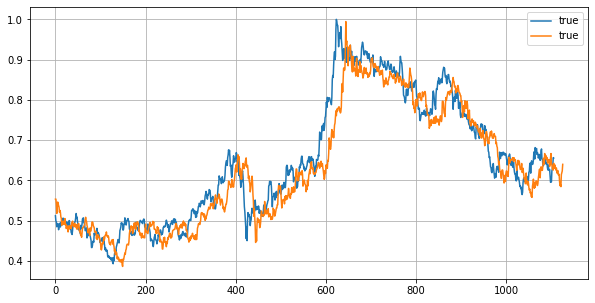

In [64]:
plt.figure(figsize=(10,5))
plt.plot(y_test[20:], label='true')
plt.plot(y_pred, label='true')
plt.grid()
plt.legend()
plt.show()

## Stack LSTM

In [77]:
model = keras.Sequential()
model.add(layers.LSTM(32,activation='tanh', return_sequences=True, input_shape=(20, 7)))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32,activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
# LSTM이 2개 => stack의 출력을 몇개 보낼 것인지 옵션을 설정해야함 (return_sequence)

model.compile(
    loss = 'mse',
    optimizer = 'rmsprop',
    metrics = ['mae']
    )

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20, 32)            5120      
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,473
Trainable params: 13,473
Non-trainable params: 0
_________________________________________________________________


In [79]:
EPOCHS = 100
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_split = 0.2,
                verbose = 1)

Epoch 1/100
113/113 [==============================] - 9s 29ms/step - loss: 0.0010 - mae: 0.0218 - val_loss: 2.2513e-04 - val_mae: 0.0120
Epoch 2/100
113/113 [==============================] - 2s 22ms/step - loss: 4.4323e-04 - mae: 0.0152 - val_loss: 2.3802e-04 - val_mae: 0.0126
Epoch 3/100
113/113 [==============================] - 3s 27ms/step - loss: 3.3843e-04 - mae: 0.0132 - val_loss: 4.3807e-04 - val_mae: 0.0150
Epoch 4/100
113/113 [==============================] - 2s 21ms/step - loss: 3.0879e-04 - mae: 0.0122 - val_loss: 4.3234e-04 - val_mae: 0.0149
Epoch 5/100
113/113 [==============================] - 2s 21ms/step - loss: 2.4427e-04 - mae: 0.0110 - val_loss: 2.7907e-04 - val_mae: 0.0130
Epoch 6/100
113/113 [==============================] - 5s 40ms/step - loss: 2.3599e-04 - mae: 0.0107 - val_loss: 3.8042e-04 - val_mae: 0.0153
Epoch 7/100
113/113 [==============================] - 4s 39ms/step - loss: 2.0992e-04 - mae: 0.0101 - val_loss: 0.0063 - val_mae: 0.0713
Epoch 8/100
11

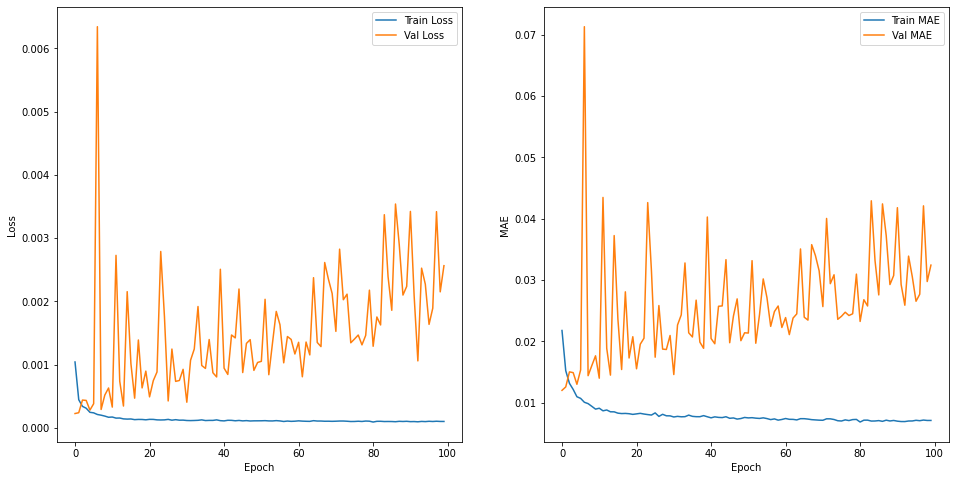

In [80]:
plot_history(log)

36/36 [==============================] - 1s 6ms/step


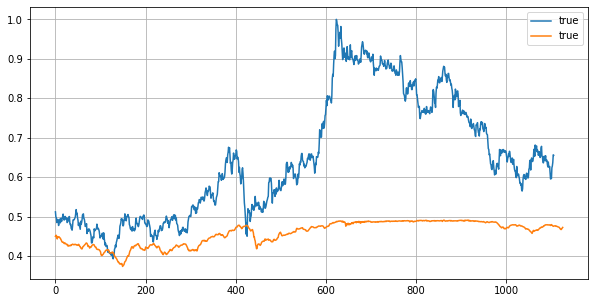

In [81]:
y_pred = model.predict(X_test).reshape(-1)
y_pred[:5]

plt.figure(figsize=(10,5))
plt.plot(y_test[20:], label='true')
plt.plot(y_pred, label='true')
plt.grid()
plt.legend()
plt.show()